Competition: https://www.kaggle.com/competitions/playground-series-s3e26/overview

log loss

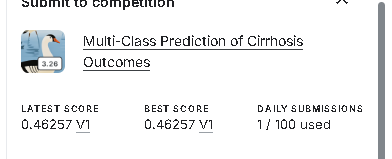

-----

☀️ Project Summary: Predicting Cirrhosis Outcomes
This project aims to develop a predictive model for cirrhosis patient outcomes using a synthetically generated dataset. With 20 diverse features covering demographic, clinical, and laboratory aspects, the dataset mirrors the complexity of real-world scenarios. Key indicators like 'Bilirubin,' 'Albumin,' and 'Prothrombin' hold clinical significance in assessing liver function. The preprocessing phase involves one-hot encoding for categorical variables and robust scaling to handle outliers. Clinical insights derived from the data align with medical expectations, affirming the dataset's relevance. Thrombocytopenia and prolonged prothrombin time emerge as crucial clinical markers. The modeling objective centers on utilizing gradient-based algorithms to navigate the intricate relationships within the dataset. Differentiating between censored ('C') and liver transplant ('CL') patients poses a significant challenge, adding a layer of complexity to the model development process. Evaluation hinges on the multi-class logarithmic loss metric, emphasizing the submission of predicted probabilities for each outcome class ('C,' 'CL,' 'D'). The success of the project holds promise for advancing our understanding of cirrhosis prognosis, with potential applications in clinical decision-making and patient care..

-----

Inference From Data Analysis

Identified outliers in 'Tryglicerides,' 'Alk_Phos,' 'Cholesterol,' 'Bilirubin,' and 'Prothrombin,' suggesting the need for robust scaling (RobustScaler) to confine values within the interquartile range (IQR). Imbalanced class distribution with the majority in class C (4,965), followed by class D (2,665) and class CL (275). 'N_days' (number of days between registration and the earlier of death, transplantation, or study analysis) highlights the temporal aspects of patient outcomes.:

Age and Patient Outcomes:(P):

Predominance of cirrhosis in individuals aged 40 and above, aligns with clinical knowledge where cirrhosis often develops in middle to older age. Higher mortality observed in older age groups corresponds with the clinical understanding of increased health complications in the elderly. Liver transplants commonly occurring before the age of 50 is consistent with clinical practices, indicating the need for transplantation in younger patients..

Bilirubin, Albumin, and Copper:

Elevated serum bilirubin levels indicate severe liver damage, aligning with clinical expectations where high bilirubin is associated with advanced liver disease. Decreased albumin production in non-survivors is clinically relevant, as impaired liver function affects protein synthesis, including albumin. Accumulation of copper in the liver aligns with clinical understanding, where disrupted copper metabolism is a characteristic of cirrhosis..

Alkaline Phosphatase (Alk_Phos) and SGOT:

Elevated Alk_Phos levels in deceased and liver transplant patients suggest cholestasis or bile duct obstruction, in line with clinical knowledge. Higher SGOT levels in D and CL patients signify liver cell damage and disease severity, clinically indicating advanced liver pathology.

Thrombocytopenia Indicator:

A binary measure indicating thrombocytopenia, with a value of 1 denoting low platelet counts and 0 indicating normal levels. Essential for health assessments, identifying potential complications related to blood clotting.

Clinical Correlation::

The comparison of synthesized data features with clinically relevant expectations supports the validity of the dataset for modeling cirrhosis outcomes. Understanding the clinical context enhances the interpretability of model predictions, allowing for more informed decision-making in patient care.


-----



# Basic example of what we should do:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# 1. Generar un conjunto de datos sintético para clasificación multiclase
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, 
                            n_informative=10, n_clusters_per_class=2, random_state=42)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Codificar las etiquetas (si es necesario)
# Aquí, las etiquetas ya son enteros, pero si fueran strings, podríamos usar LabelEncoder.
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

# 4. Crear y entrenar el modelo de regresión logística (que puede devolver probabilidades)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# 5. Obtener probabilidades de predicción para cada clase
probs = model.predict_proba(X_test)

# 6. Convertir las probabilidades en un DataFrame, donde cada columna representa una clase
probs_df = pd.DataFrame(probs, columns=[f'Class_{i}' for i in model.classes_])

# 7. Visualizar las primeras 5 predicciones con probabilidades
print(probs_df.head())


    Class_0   Class_1   Class_2
0  0.169366  0.008681  0.821954
1  0.321172  0.649641  0.029187
2  0.149778  0.008782  0.841440
3  0.154542  0.007167  0.838291
4  0.153252  0.784463  0.062285


In [2]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# 1. Obtener las predicciones (clase con mayor probabilidad)
y_pred = model.predict(X_test)

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 3. Log Loss
log_loss_value = log_loss(y_test, probs)
print(f'Log Loss: {log_loss_value:.4f}')

# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 5. Classification Report (Precision, Recall, F1-Score por clase)
class_report = classification_report(y_test, y_pred, target_names=[f'Class_{i}' for i in model.classes_])
print("Classification Report:")
print(class_report)

from sklearn.metrics import log_loss

# Predicciones de probabilidades
probs = model.predict_proba(X_test)

# Log Loss: comparando las probabilidades predichas con las etiquetas reales
log_loss_value = log_loss(y_test, probs)
print(f"Log Loss: {log_loss_value}")


Accuracy: 0.7550
Log Loss: 0.6157
Confusion Matrix:
[[41 10 10]
 [13 65  3]
 [13  0 45]]
Classification Report:
              precision    recall  f1-score   support

     Class_0       0.61      0.67      0.64        61
     Class_1       0.87      0.80      0.83        81
     Class_2       0.78      0.78      0.78        58

    accuracy                           0.76       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.76      0.76       200

Log Loss: 0.6157182501981578


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss, classification_report

# 1. Generar un conjunto de datos sintético para clasificación multiclase
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, 
                            n_informative=10, n_clusters_per_class=2, random_state=42)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Codificar las etiquetas (si es necesario)
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

# 4. Crear y entrenar varios modelos
models = [
    LogisticRegression(multi_class='ovr', solver='liblinear'),
    SVC(probability=True, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

# 5. Entrenar los modelos
for model in models:
    model.fit(X_train, y_train)

# 6. Obtener las probabilidades de predicción para cada modelo
probs_all_models = [model.predict_proba(X_test) for model in models]

# 7. Promediar las probabilidades predichas
probs_avg = np.mean(probs_all_models, axis=0)

# 8. Convertir las probabilidades promediadas en un DataFrame
probs_df_avg = pd.DataFrame(probs_avg, columns=[f'Class_{i}' for i in range(len(models[0].classes_))])

# 9. Visualizar las primeras 5 predicciones con probabilidades promediadas
print(probs_df_avg.head())

# 10. Obtener las predicciones (clase con mayor probabilidad promedio)
y_pred_avg = np.argmax(probs_avg, axis=1)

# 11. Evaluar el modelo de ensemble

# Accuracy
accuracy = accuracy_score(y_test, y_pred_avg)
print(f'Accuracy: {accuracy:.4f}')

# Log Loss
log_loss_value = log_loss(y_test, probs_avg)
print(f'Log Loss: {log_loss_value:.4f}')

# Classification Report (Precision, Recall, F1-Score por clase)
class_report = classification_report(y_test, y_pred_avg, target_names=[f'Class_{i}' for i in range(len(models[0].classes_))])
print("Classification Report:")
print(class_report)


    Class_0   Class_1   Class_2
0  0.143023  0.043693  0.813284
1  0.230524  0.741110  0.028366
2  0.091096  0.036556  0.872348
3  0.093138  0.022796  0.884066
4  0.115344  0.805326  0.079331
Accuracy: 0.8500
Log Loss: 0.4510
Classification Report:
              precision    recall  f1-score   support

     Class_0       0.76      0.82      0.79        61
     Class_1       0.91      0.86      0.89        81
     Class_2       0.88      0.86      0.87        58

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



# ESTO TENDRIAMOS QUE HACER

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# 1. Generar un conjunto de datos sintético para clasificación multiclase
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, 
                            n_informative=10, n_clusters_per_class=2, random_state=42)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Codificar las etiquetas (si es necesario)
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

# 4. Preprocesamiento de columnas numéricas y categóricas (si existieran)
# Aquí solo hay variables numéricas en el ejemplo, pero si tuvieras variables categóricas, las manejarías aquí.
num_cols = [col for col in range(X.shape[1])]  # Asumimos que todas las columnas son numéricas

# Crear un preprocesador que estandarice las variables numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
    ])

# 5. Crear la pipeline con el preprocesamiento y el modelo
model = LogisticRegression(multi_class='ovr', solver='liblinear')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# 6. Validación cruzada para evaluar el modelo
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# >>>mod. to neg_log_loss<<<

print(f'Cross-validation accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

# 7. Ajuste final y predicciones sobre el conjunto de prueba
pipeline.fit(X_train, y_train)

# Obtener las predicciones de probabilidad para cada clase
probs = pipeline.predict_proba(X_test)

# Convertir las probabilidades en un DataFrame
probs_df = pd.DataFrame(probs, columns=[f'Class_{i}' for i in model.classes_])
print("Predicted Probabilities:")
print(probs_df.head())

# Predicciones de clase con mayor probabilidad
y_pred = pipeline.predict(X_test)

# 8. Evaluación de métricas
# 8.1 Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 8.2 Log Loss
log_loss_value = log_loss(y_test, probs)
print(f'Log Loss: {log_loss_value:.4f}')

# 8.3 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 8.4 Classification Report
class_report = classification_report(y_test, y_pred, target_names=[f'Class_{i}' for i in model.classes_])
print("Classification Report:")
print(class_report)


Cross-validation accuracy: 0.6712 ± 0.0146
Predicted Probabilities:
    Class_0   Class_1   Class_2
0  0.168959  0.010320  0.820720
1  0.322669  0.646169  0.031162
2  0.149699  0.010384  0.839918
3  0.154098  0.008599  0.837303
4  0.153373  0.781247  0.065380
Accuracy: 0.7550
Log Loss: 0.6161
Confusion Matrix:
[[41 10 10]
 [13 65  3]
 [13  0 45]]
Classification Report:
              precision    recall  f1-score   support

     Class_0       0.61      0.67      0.64        61
     Class_1       0.87      0.80      0.83        81
     Class_2       0.78      0.78      0.78        58

    accuracy                           0.76       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.76      0.76       200



---

# Setup

In [5]:
import os
import warnings
from pathlib import Path

# Data handling and processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_predict

# Statsmodels
import statsmodels.api as sm
import tensorflow as tf

# Configure plotting styles
plt.style.use("seaborn-darkgrid")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def load():
    train = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv", index_col = "id")
    test= pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv", index_col = "id")
    display(train.head(2))
    print("train size: ", train.shape)
    return train,test

train,test = load()


<ipython-input-5-1fa1a5fcc41a>:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C


train size:  (7905, 19)


In [6]:
train.Status.value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

# Data

## duplicated:

In [7]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


## Info and Desc. Statics

In [8]:
display(train.info())
train.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status       

None

,count,mean,std,min,25%,50%,75%,max
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00
Platelets,7905.0,265.228969,87.465579,62.00,211.00,265.00,316.00,563.00


## Missing, Gaps and  Cardinality

In [9]:
print("Missing: \n 0")

# def missing(df):
#     df.isnull()
def m(train):
    print(train.isnull().mean()*100)
    print(train.isnull().sum())

# m(train)
# print("test \n")
# m(test)

print("Cardinality: \n", train.nunique())

Missing: 
 0
Cardinality: 
 N_Days           461
Drug               2
Age              391
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        111
Cholesterol      226
Albumin          160
Copper           171
Alk_Phos         364
SGOT             206
Tryglicerides    154
Platelets        227
Prothrombin       49
Stage              4
Status             3
dtype: int64


# EDA

## Target dist. - Status - Univariate analysis

train
Class distribution:
 Status
C     4965
D     2665
CL     275
Name: count, dtype: int64
Majority class: C
Naive baseline accuracy: 62.81%


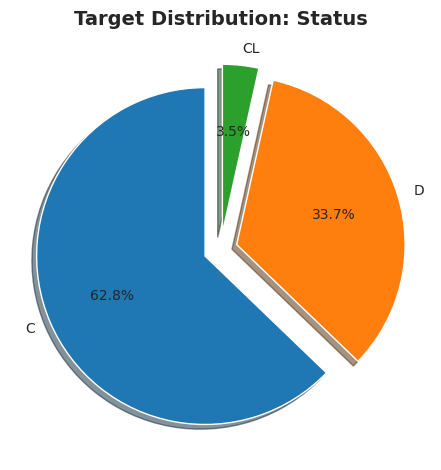

In [10]:
import matplotlib.pyplot as plt

def target_dist(df, target="str"):
    """
    IN
    pandas df with "y"
    target: string type (column name in the dataframe)
    """
    
    # Analyze the class distribution
    class_distribution = df[target].value_counts()
    print("Class distribution:\n", class_distribution)
    
    # Identify the majority class
    majority_class = class_distribution.idxmax()
    majority_class_count = class_distribution.max()
    
    # Calculate naive baseline accuracy
    naive_baseline_accuracy = majority_class_count / len(df)
    print(f"Majority class: {majority_class}")
    print(f"Naive baseline accuracy: {naive_baseline_accuracy*100:.2f}%")
    
    # Pie Plot
    
    # Define the labels for the pie chart (Ensure it matches the unique classes)
    labels = class_distribution.index.tolist()
    sizes = class_distribution.values
    
    # Explode values to highlight a slice (make sure the length matches the number of classes)
    explode = [0.1] * len(labels)  # Highlight all slices with slight separation
    
    # Create the pie chart
    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90)
    
    # Add a title and show the plot
    ax.set_title(f'Target Distribution: {target}')
    plt.show()

# Ejemplo de uso con el dataframe 'train' y la columna 'Status'
print("train")
target_dist(train, "Status")


In [11]:
train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


## Categoricals columns vs target - Bar Plot - Bivariate analysis

In the dataset:

- **C (censored)**: The patient was alive at N_Days, meaning the observation ended before the event (death or liver transplant) occurred.
- **CL**: The patient was alive at N_Days due to a liver transplant, indicating survival through transplantation.
- **D (deceased)**: The patient was deceased at N_Days.

Remember: the objective is to predict the probability of each status (C, CL, D) for the test dataset.

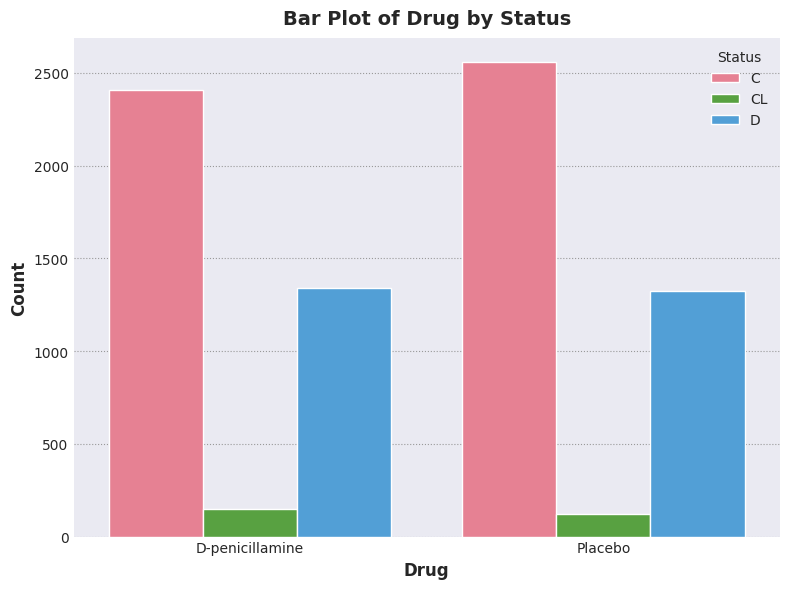

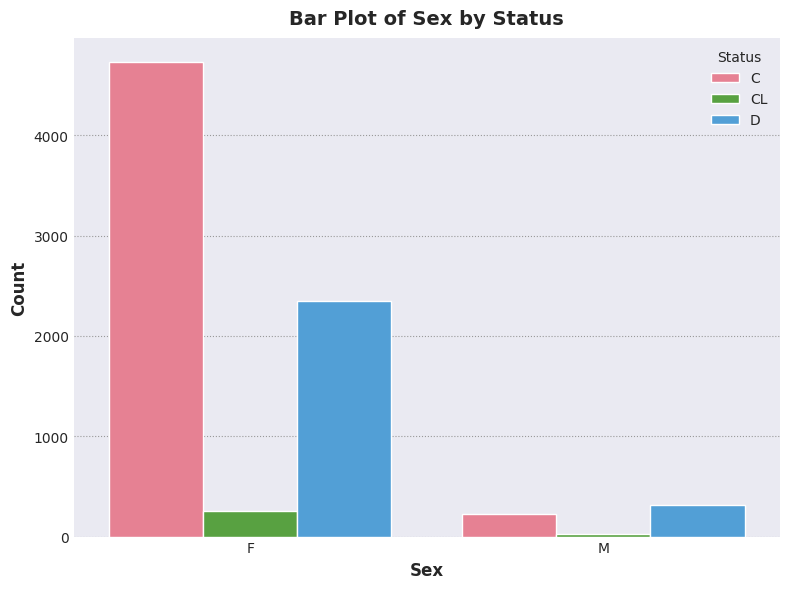

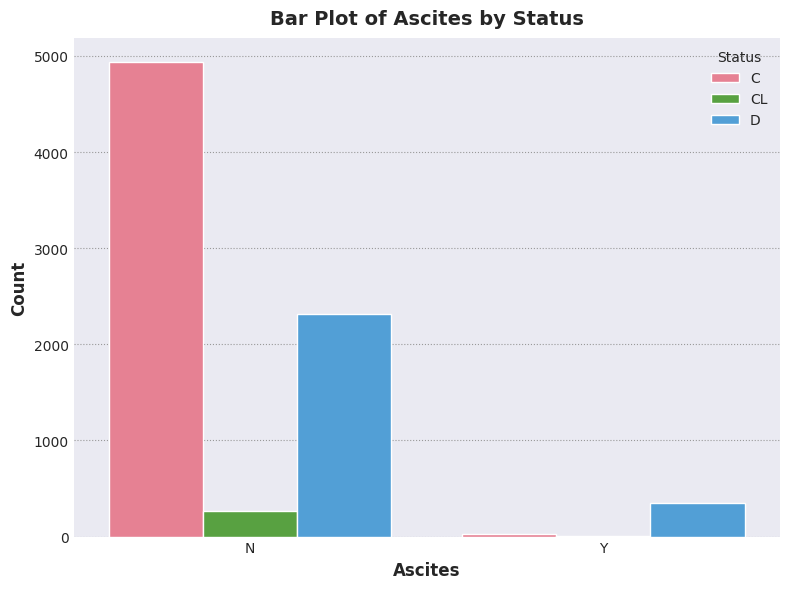

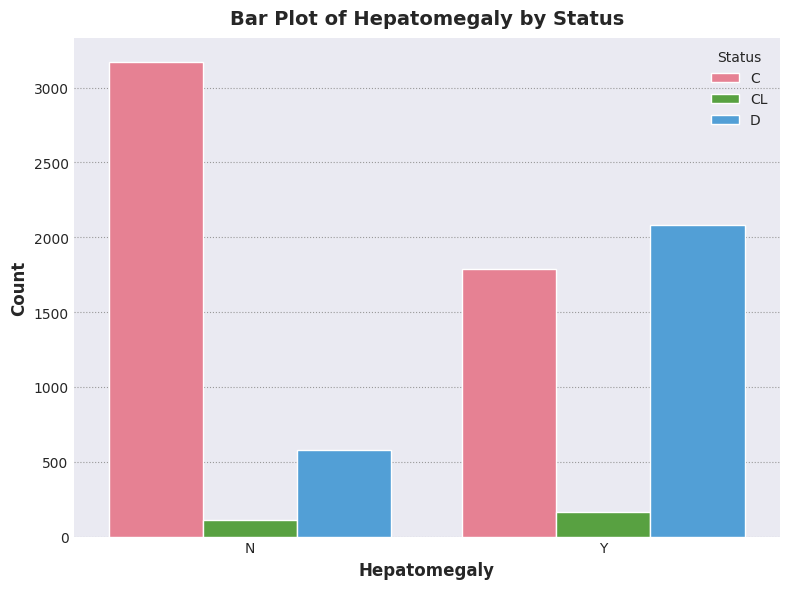

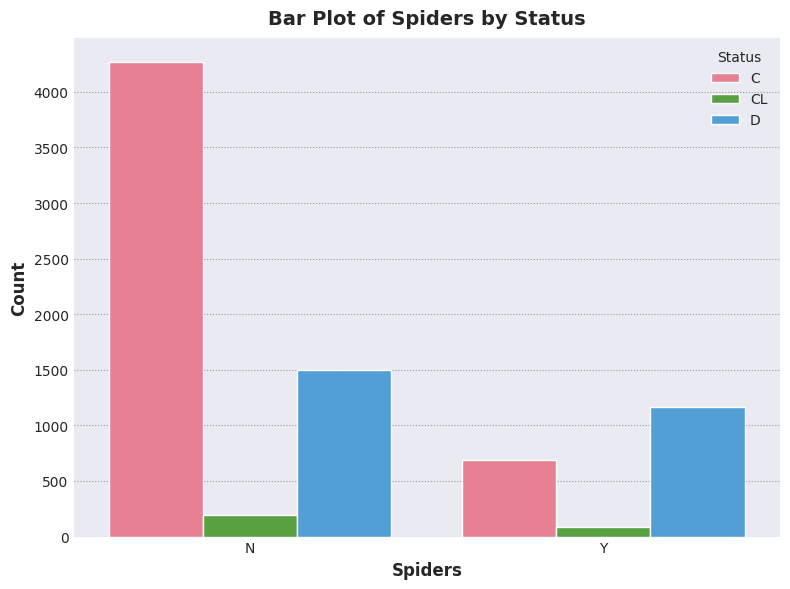

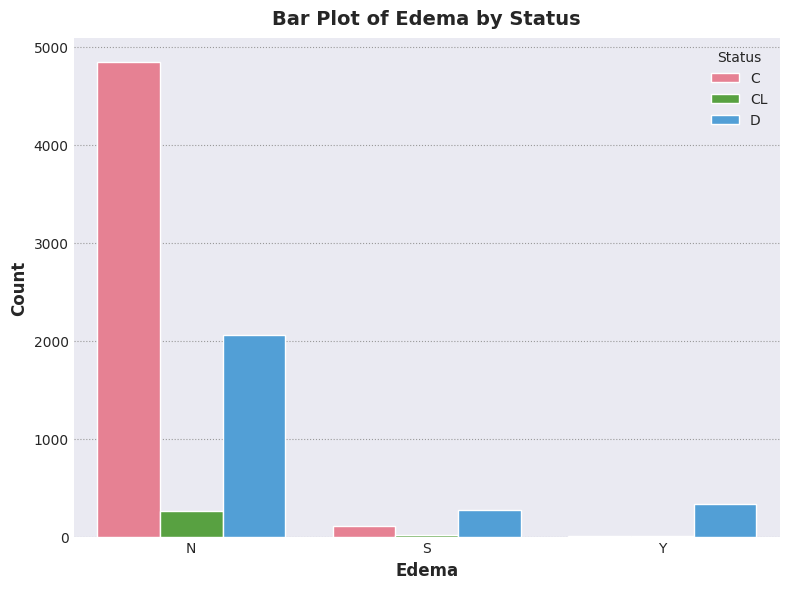

In [12]:
# List of categorical columns
cat_cols = [col for col in train.columns if train[col].dtype == "O" and col != "Status"]

# Iterate through each categorical column
for col in cat_cols:
    # Group by the column and target (Survived), then count occurrences
    category_counts = train.groupby([col, 'Status']).size().reset_index(name='counts')
    
    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=category_counts, x=col, y='counts', hue='Status', palette='husl')
    
    # Add title and labels
    plt.title(f'Bar Plot of {col} by Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Status', loc='upper right')
    
    # Show the plot
    plt.show()

## Numerical Columns - Bivariate and Multivariate Analysis - Boxplot and Correlation Plot (Pearson)


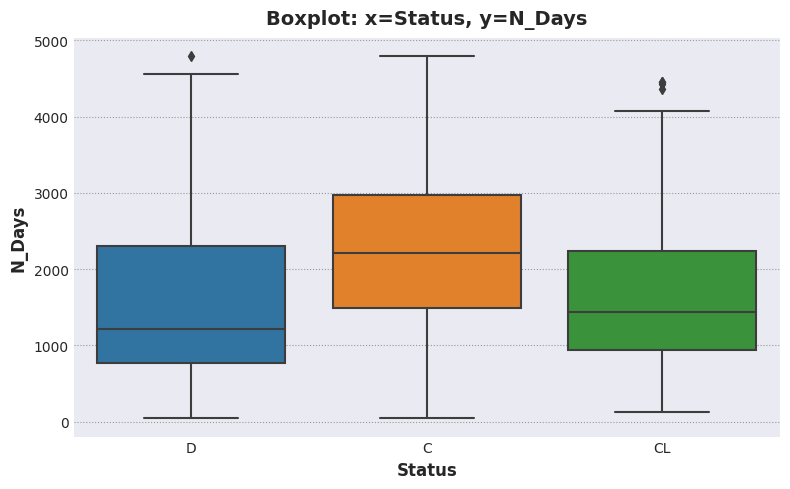

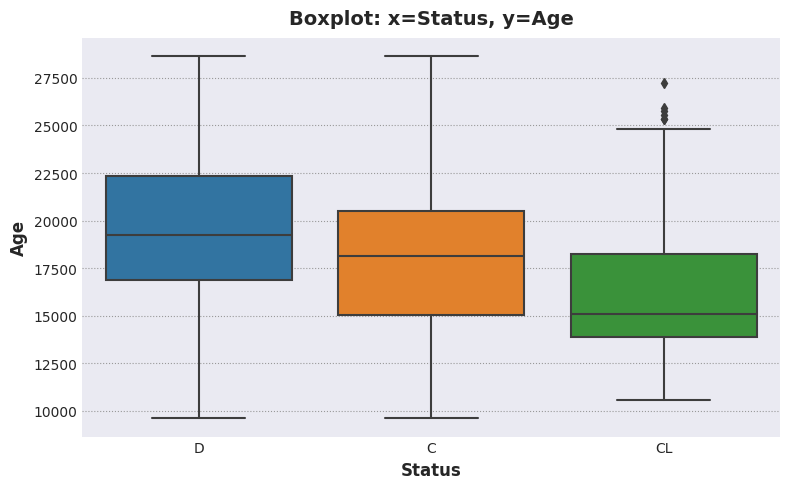

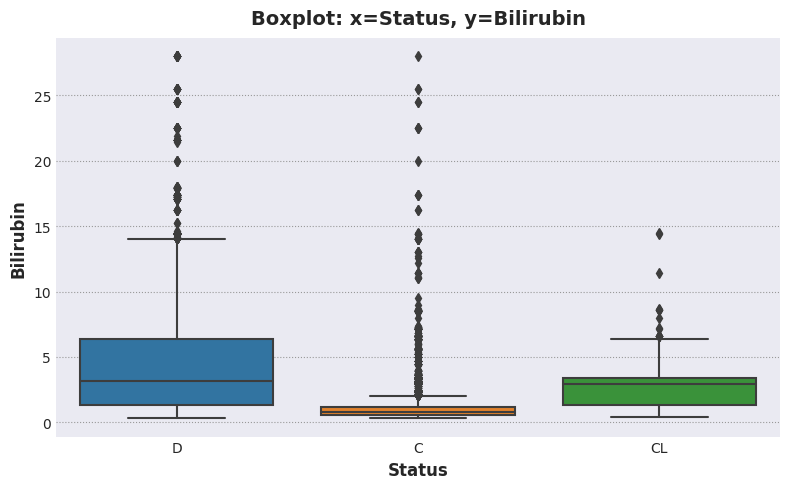

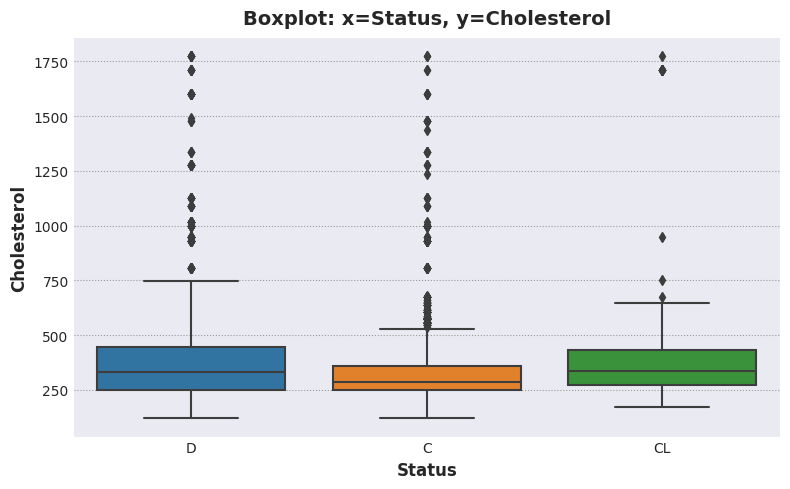

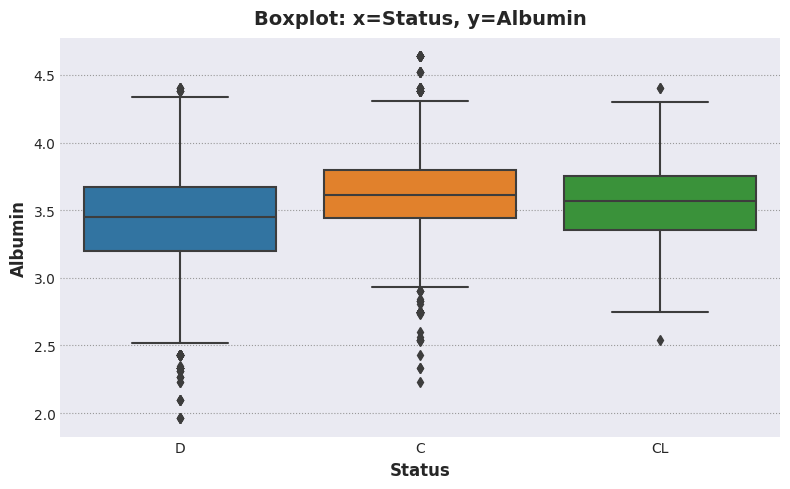

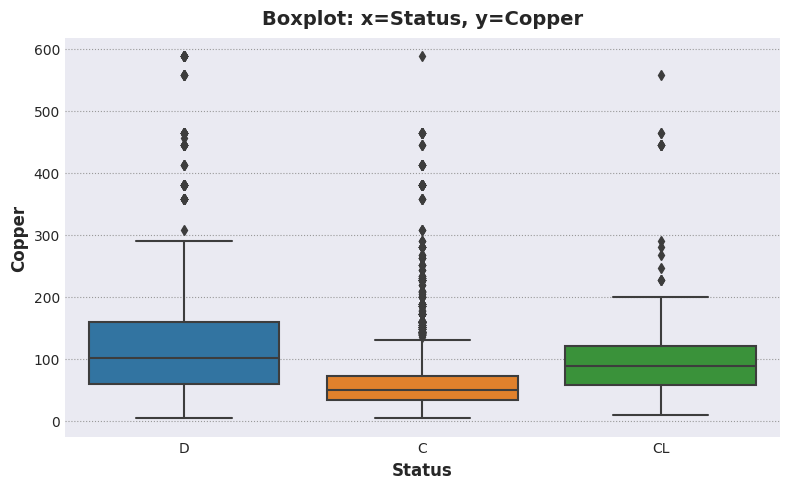

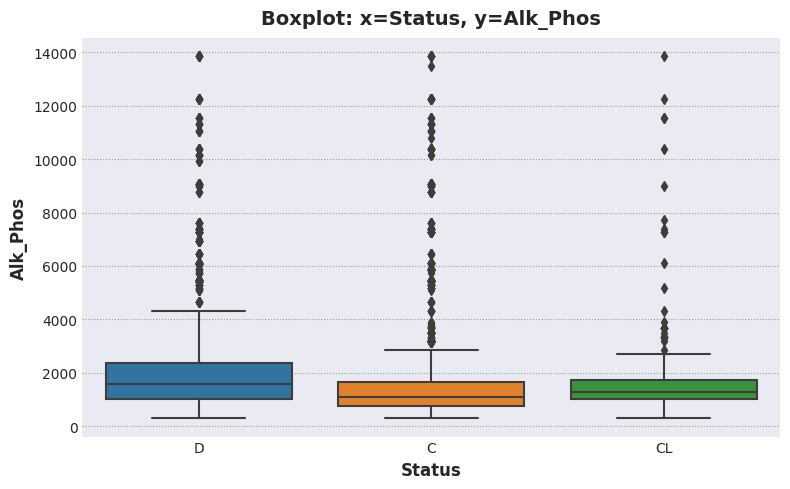

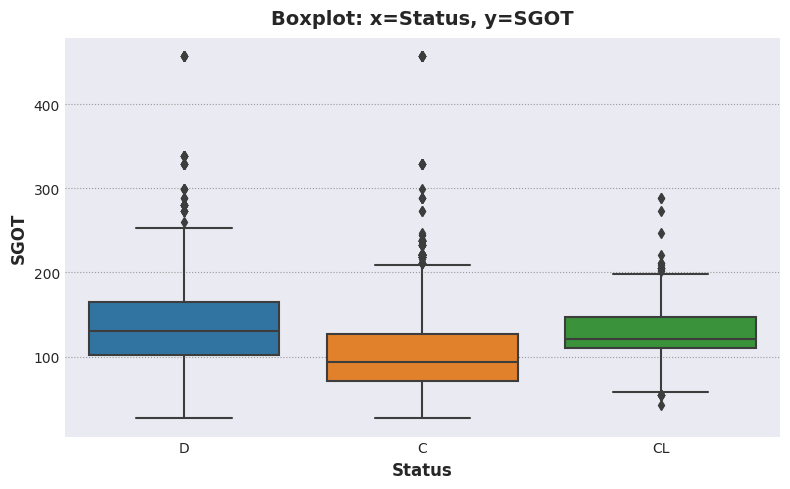

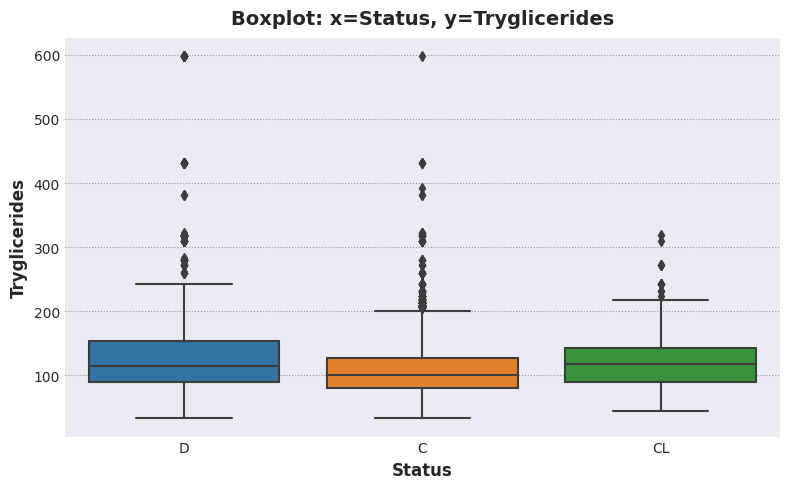

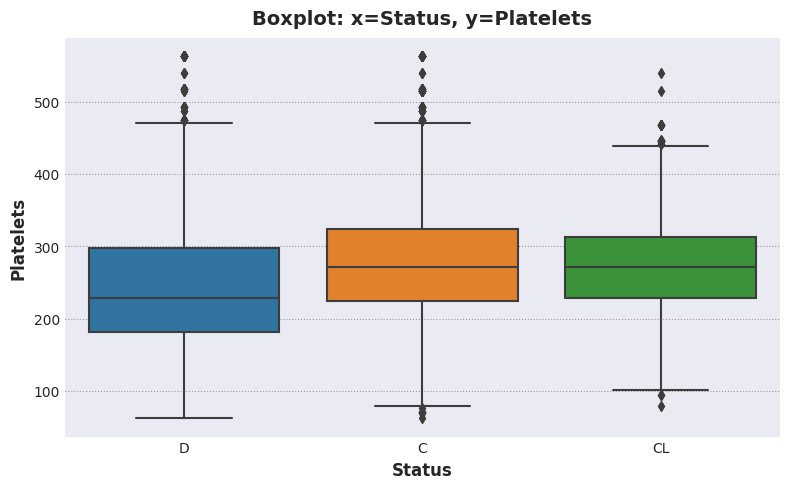

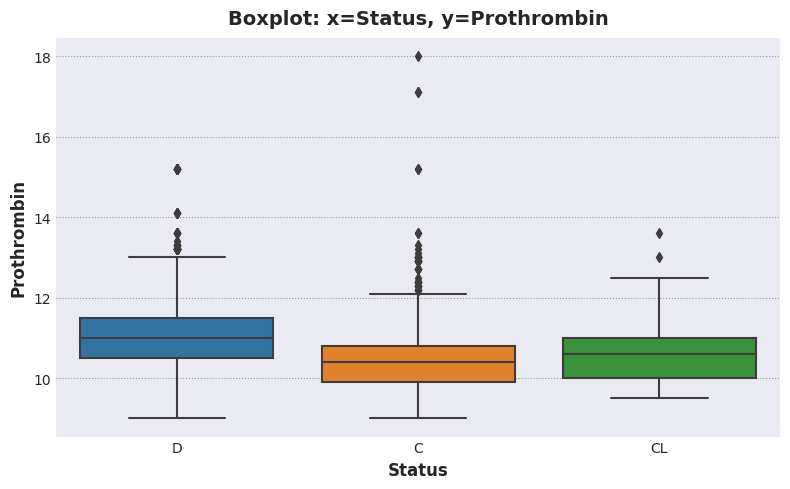

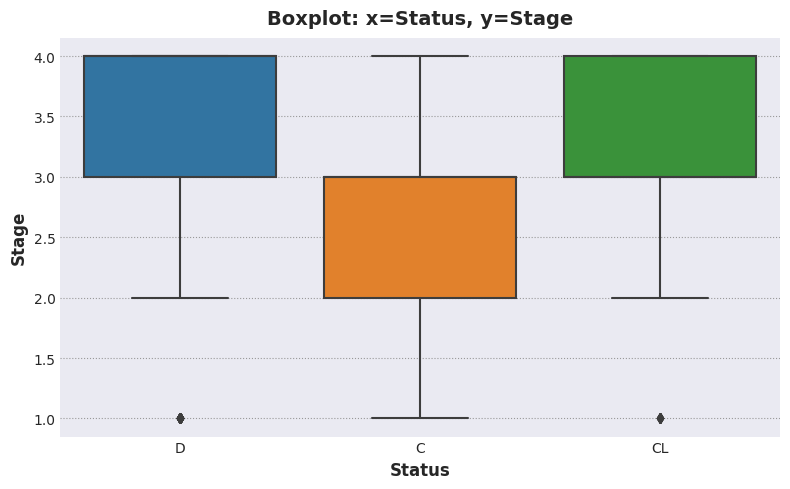

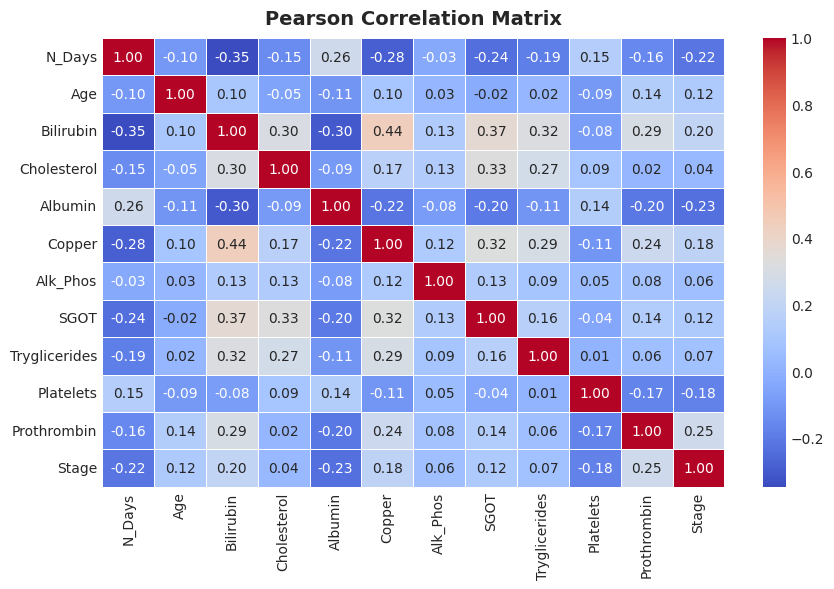

In [13]:
num_cols = [col for col in train.columns if train[col].dtype != "O"]

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train, x='Status', y=f'{col}')
    plt.title(f'Boxplot: x=Status, y={col}')
    plt.show()


# plt.figure(figsize=(8, 5))
# sns.boxplot(data=train, x='Status', y='N_Days')
# plt.title('Boxplot: x=Status, y=N_Days ')
# plt.show()

# Calcular la matriz de correlación de Pearson
corr_matrix = train[num_cols].corr(method='pearson')

# Graficar la matriz de correlación
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# Preprocess

In [14]:
# aux
train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D


In [15]:
train[cat_cols].nunique()

Drug            2
Sex             2
Ascites         2
Hepatomegaly    2
Spiders         2
Edema           3
dtype: int64

In [16]:
interest = ["Spiders","Edema", "Sex", "Ascites", "Hepatomegaly"]
for i in interest: 
    display(train[i].value_counts())

Spiders
N    5966
Y    1939
Name: count, dtype: int64

Edema
N    7161
S     399
Y     345
Name: count, dtype: int64

Sex
F    7336
M     569
Name: count, dtype: int64

Ascites
N    7525
Y     380
Name: count, dtype: int64

Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64

In [17]:
train_size = train.shape[0]

X = train.copy()
y = X.pop("Status")
#>>><<<

full = pd.concat([X,test], axis = 0)

In [18]:

def preprocess(full, y):
    global target_encoder
    global y_encoded
    
    # Codificar columnas categóricas
    for col in cat_cols:
        full[col] = LabelEncoder().fit_transform(full[col])
    
    # Codificar la variable objetivo y
    target_encoder = LabelEncoder()
    y_encoded = target_encoder.fit_transform(y)
    
    # Mostrar los resultados de codificación (opcional)
    display(y_encoded)
    display(full)
    
    # Separar X y test (suponiendo que tienes una variable train_size definida)
    X = full[:train_size]
    test = full[train_size:]
    
    # Devolver los datos procesados
    return X, y_encoded, test

# Llamada a la función
X, y_encoded, X_test = preprocess(full, y)


array([2, 0, 2, ..., 2, 2, 0])

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,1,12279,0,0,0,0,0,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
13172,1770,1,24803,0,0,0,0,0,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
13173,3707,0,16990,0,0,1,0,0,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0


## Imbalancing? --> apply: 

In [19]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# Aplicar ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)
print(y.value_counts())

Status
D     5021
C     4965
CL    4879
Name: count, dtype: int64


# Base Line

scorers: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report


"""
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
    ])

# 5. Crear la pipeline con el preprocesamiento y el modelo
model = LogisticRegression(multi_class='ovr', solver='liblinear')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])
"""

# def base_score(X,y, pipeline, verbose = True):
#     """ 
#     IN
#         - num_cols: num_list columns of the first df
#         - X and y: pd df with a basic preprocessed with label encoder
#         - pipeline: scikitlearn framework Pipeline
#     OUT
#         return "np.mean(cv_scores"
#     """
#     cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
#     cv_scores = -cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')

#     mean_cv = np.mean(cv_scores)
#     std_cv = np.std(cv_scores)

#     print(f'Cross-validation accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

#     if verbose == True:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#         pipeline.fit(X_train, y_train)
#         # Prob. pred
#         probs = pipeline.predict_proba(X_test)
#         # Converts prob. to df
#         probs_df = pd.DataFrame(probs, columns=[f'Class_{i}' for i in model.classes_])
#         print("Predicted Probabilities:")
#         print(probs_df.head())

#         y_pred = pipeline.predict(X_test)

#         # 8. Metrics
#         # 8.1 Accuracy
#         accuracy = accuracy_score(y_test, y_pred)
#         print(f'Accuracy: {accuracy:.4f}')
        
#         # 8.2 Log Loss
#         log_loss_value = log_loss(y_test, probs)
#         print(f'Log Loss: {log_loss_value:.4f}')
        
#         # 8.4 Classification Report
#         class_report = classification_report(y_test, y_pred, target_names=[f'Class_{i}' for i in model.classes_])
#         print("Classification Report:")
#         print(class_report)
#         return mean_cv
        
#     else: 
#         return mean_cv

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, log_loss, classification_report
import numpy as np
import pandas as pd

def base_score(X, y, pipeline, verbose=True):
    """
    Evaluates a pipeline using Stratified K-Fold cross-validation and handles class imbalance.
    
    Args:
        X (pd.DataFrame): Features.
        y (pd.Series): Target variable.
        pipeline (Pipeline): scikit-learn pipeline with preprocessing and model.
        verbose (bool): If True, prints detailed metrics. Default is True.
    
    Returns:
        float: Mean cross-validated Log Loss.
    """
    # Encode target variable to handle class weights correctly
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Stratified K-Fold for cross-validation
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    cv_scores = -cross_val_score(pipeline, X, y_encoded, cv=cv, scoring='neg_log_loss')

    mean_cv = np.mean(cv_scores)
    std_cv = np.std(cv_scores)

    print(f'Cross-validated Log Loss: {mean_cv:.4f} ± {std_cv:.4f}')

    if verbose:
        # Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

        # Handle class imbalance
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = dict(enumerate(class_weights))

        # Update model's class weight (if supported)
        model = pipeline.named_steps['model']  # Assumes the model is named 'model' in the pipeline
        if hasattr(model, 'class_weight'):
            model.set_params(class_weight=class_weight_dict)

        # Fit the pipeline
        pipeline.fit(X_train, y_train)

        # Predicted probabilities
        probs = pipeline.predict_proba(X_test)
        probs_df = pd.DataFrame(probs, columns=[f'Status_{cls}' for cls in le.classes_])
        print("Predicted Probabilities (first 5 rows):")
        print(probs_df.head())

        # Predicted labels
        y_pred = pipeline.predict(X_test)

        # Log Loss
        log_loss_value = log_loss(y_test, probs)
        print(f'Log Loss: {log_loss_value:.4f}')

        # Classification Report
        class_report = classification_report(y_test, y_pred, target_names=[f'Class_{cls}' for cls in le.classes_])
        print("Classification Report:")
        print(class_report)

        # 4. Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)

    return mean_cv



In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from xgboost import XGBClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# 1. Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaler", StandardScaler(), num_cols),
        ('discretizer', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform'), num_cols),
    ])

model1 = XGBClassifier(
    objective='multi:softprob',  # Cambiar según el problema: 'binary:logistic' para binario
    random_state=42,
    n_jobs = -1
)


import lightgbm as lgb

# LightGBM para clasificación multiclase
model4 = lgb.LGBMClassifier(
    objective='multiclass',  # Definir el objetivo para clasificación multiclase
    num_class=3,  # Número de clases (ajusta según tus datos)
    random_state=42,
    n_jobs=-1,
    verbose = -1
    
)

models = [model1,model4]

for model in models:
    # 3. Crear la pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # 4. Evaluar con base_score
    das = base_score(X, y, pipeline)
    print("model: ", model)
    print(f"Mean CV Log Loss: {das} \n")


Cross-validated Log Loss: 0.3017 ± 0.0091
Predicted Probabilities (first 5 rows):
   Status_C  Status_CL  Status_D
0  0.897626   0.023384  0.078990
1  0.074179   0.053700  0.872121
2  0.069365   0.274242  0.656393
3  0.004564   0.000319  0.995117
4  0.001662   0.002929  0.995409
Log Loss: 0.2911
Classification Report:
              precision    recall  f1-score   support

     Class_C       0.88      0.87      0.87       993
    Class_CL       0.94      0.98      0.96       976
     Class_D       0.87      0.85      0.86      1004

    accuracy                           0.90      2973
   macro avg       0.90      0.90      0.90      2973
weighted avg       0.90      0.90      0.90      2973

Confusion Matrix:
[[860  17 116]
 [ 11 956   9]
 [104  46 854]]
model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_catego

In [22]:
models = [model1,model4]
models

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='multi:softprob', ...),
 LGBMClassifier(class_weight={0: 0.9979859013091642, 1: 1.015629003330771,
                              2: 0.986806074184715},
                n_jobs=-1, num_class=3, objective='multiclass', random_state=42,
              

In [23]:
import numpy as np

models = [model1, model4]
all_probs = []

for model in models:
    # 3. Crear la pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Encode target variable to handle class weights correctly
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    pipeline.fit(X, y_encoded)
    
    # Obtener las probabilidades predichas
    probs = pipeline.predict_proba(X_test)
    
    # Almacenar las probabilidades
    all_probs.append(probs)

# Calcular las probabilidades promedio a través de los modelos
avg_probs = np.mean(all_probs, axis=0)

# Convertir las probabilidades promedio a un DataFrame
avg_probs_df = pd.DataFrame(avg_probs, columns=[f'Status_{cls}' for cls in le.classes_])

# Mostrar las probabilidades promedio
print("Average Predicted Probabilities (first 5 rows):")
print(avg_probs_df.head())


Average Predicted Probabilities (first 5 rows):
   Status_C  Status_CL  Status_D
0  0.718556   0.013404  0.268040
1  0.708341   0.106711  0.184948
2  0.010256   0.013145  0.976599
3  0.963058   0.001207  0.035735
4  0.938017   0.016318  0.045665


In [24]:
avg_probs_df.set_index(X_test.index, inplace = True)
avg_probs_df


,Status_C,Status_CL,Status_D
id,,,
7905,0.718556,0.013404,0.268040
7906,0.708341,0.106711,0.184948
7907,0.010256,0.013145,0.976599
7908,0.963058,0.001207,0.035735
7909,0.938017,0.016318,0.045665
...,...,...,...
13171,0.891899,0.069719,0.038382
13172,0.984539,0.001883,0.013578
13173,0.920612,0.007024,0.072364


In [25]:
avg_probs_df.to_csv("submission.csv")